<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 5</h3>
    <h3>Ejercicio 3</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p><p>Asistentes: Sebastián Calcagno y Braian Drago <p> <p>
</div>

In [ ]:
# instalamos librerias
# !pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Los datos son diarios desde el 1 de enero de 2013 hasta el 24 de abril de 2017 en la ciudad de Delhi, India.

In [ ]:
# Aca tenemos la columna df de fecha convertida a tipo datetime
# las columnas renombradas adecuadamente para ser utilizadas como entrada de modelo prophet .



df.date = pd.to_datetime(df.date)
df = df.rename(columns = {'date':'ds', 'meantemp':'y'})

In [ ]:
df

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


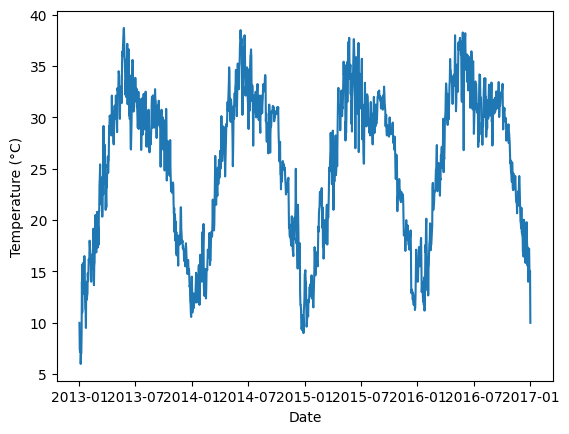

In [ ]:
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
# Creamos un objeto Prophet y ajustamos a los datos.
model = Prophet()
model.fit(df) # usamos el método fit para ajustar el modelo a los datos

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2a24dtl/yjox1u7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2a24dtl/3g991rcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6124', 'data', 'file=/tmp/tmpv2a24dtl/yjox1u7m.json', 'init=/tmp/tmpv2a24dtl/3g991rcb.json', 'output', 'file=/tmp/tmpv2a24dtl/prophet_modele7axdrr4/prophet_model-20241022170819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Crear un marco de datos futuro
# Asi podemos usar junto con el modelo ajustado para hacer predicciones.
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-01


In [ ]:
# Hacer predicciones para fechas futuras.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1822,2017-12-28,15.763790,13.384535,18.354109
1823,2017-12-29,15.666960,13.122295,18.362368
1824,2017-12-30,15.534900,12.679654,18.359317
1825,2017-12-31,15.394173,12.701382,18.079734
1826,2018-01-01,15.582847,12.901412,18.147500


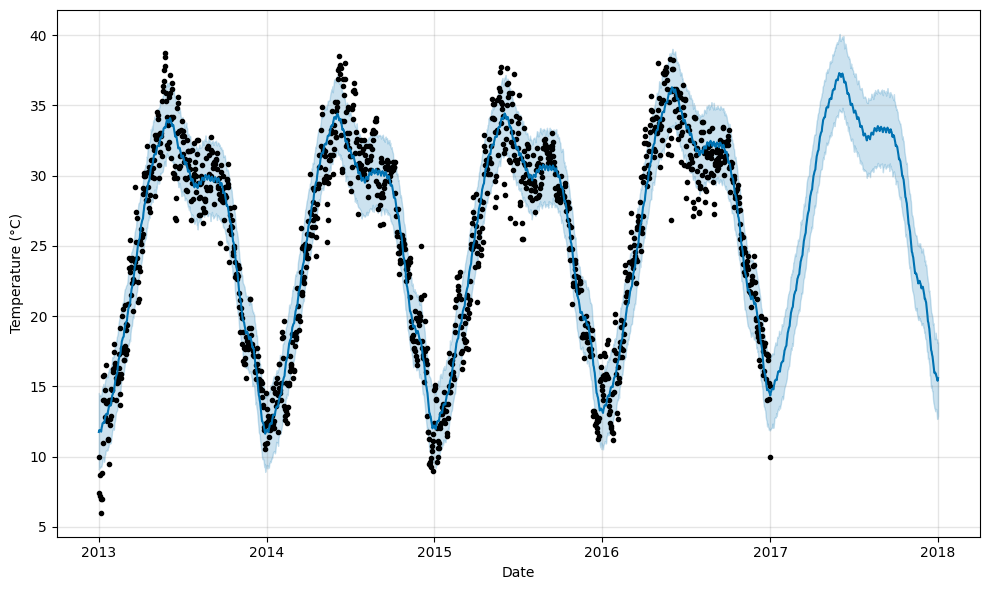

In [ ]:
# Visualiza las predicciones
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

El gráfico muestra los datos de temperatura reales como puntos negros, los valores pronosticados como una línea azul y los intervalos de predicción como áreas sombreadas en azul.

In [ ]:
future = df[df.ds > '2016-09-01'] # nuevo dataFrame "future" que tiene las filas de df donde el valor en la columna ds es posterior al 1 de septiembre de 2016.
train = df[df.ds <= '2016-09-01'] # nuevo dataframe "train" que tiene las filas de df donde el valor en la columna ds es el 1 de septiembre de 2016 o anterior.


In [ ]:
train.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Prophet también permite incorporar regresores adicionales en el modelo. Los regresores son variables externas que pueden influir en la serie temporal. La inclusión de regresores en el modelo puede mejorar la precisión de los pronósticos al capturar los efectos de estas variables externas en las series temporales.

In [ ]:
# Aqui prophet se ajusta usando los datos de entrenamiento y la relación con los regresores adicionales (humidity, wind_speed, meanpressure).

model = Prophet()
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('meanpressure')
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2a24dtl/ion7k3ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2a24dtl/43eg5kz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71461', 'data', 'file=/tmp/tmpv2a24dtl/ion7k3ou.json', 'init=/tmp/tmpv2a24dtl/43eg5kz2.json', 'output', 'file=/tmp/tmpv2a24dtl/prophet_model84t244vp/prophet_model-20241022171222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Hacer predicciones para fechas futuras.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
117,2016-12-28,15.848134,13.724811,17.874363
118,2016-12-29,13.046671,10.852801,15.172441
119,2016-12-30,12.924663,10.729833,15.196232
120,2016-12-31,13.323246,11.308709,15.328043
121,2017-01-01,11.914468,9.793999,13.892060


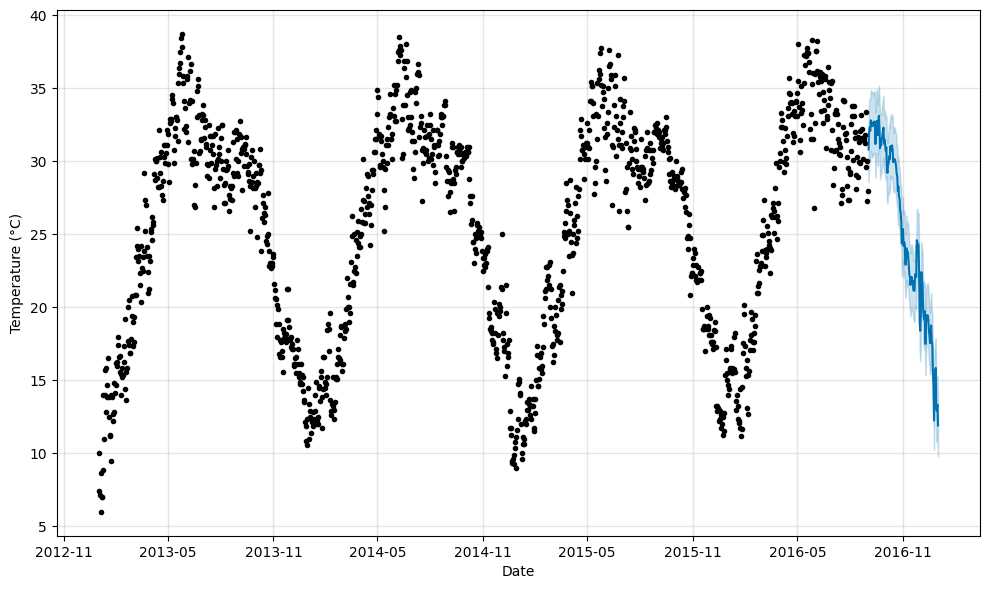

In [ ]:
# Visualiza las predicciones
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
#serie original
future.tail()

,ds,y,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
# serie proyectada
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
117,2016-12-28,15.848134,13.724811,17.874363
118,2016-12-29,13.046671,10.852801,15.172441
119,2016-12-30,12.924663,10.729833,15.196232
120,2016-12-31,13.323246,11.308709,15.328043
121,2017-01-01,11.914468,9.793999,13.892060


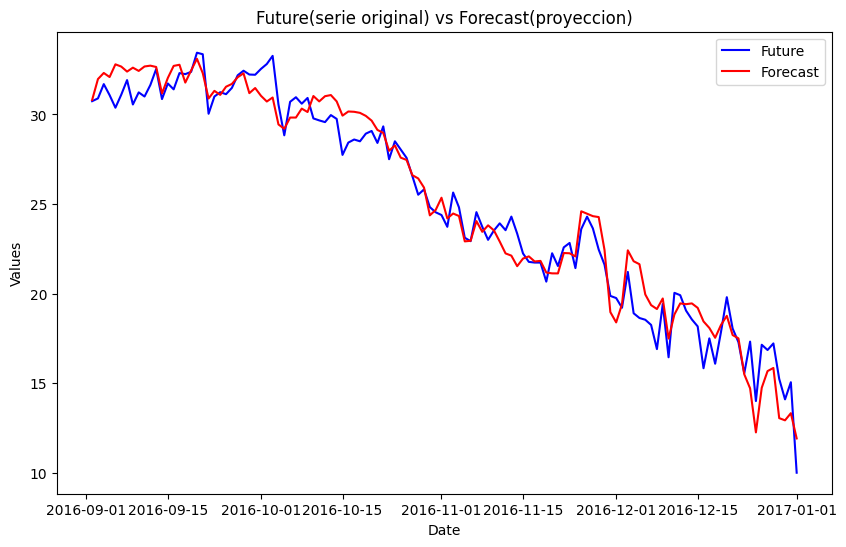

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(future['ds'], future['y'], label='Future', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Future(serie original) vs Forecast(proyeccion)')
plt.legend()

# gráfico
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mae, mse,

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast['yhat']  # Predicciones de la serie forecast ('yhat' es la predicción puntual)

mae, mse = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")



Métricas de pronóstico versus futuro:
MAE: 0.9291619731955215
MSE: 1.363415481367719
